# Getting dependencies
opencv - pyton, labelme, tensorflow, tensorflow - gpu, matplotlib
albumentations

In [1]:
#import tensorflow as tf
#print(tf.__version__)

2.8.0


In [2]:
import sys
print(sys.version)

3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:24:38) 
[Clang 12.0.1 ]


# Collecting images using OpenCV

In [3]:
import os
import time
import uuid
import cv2

In [4]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [7]:
# Establishes connection to video camera
cap = cv2.VideoCapture(0)


for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()

    cv2.startWindowThread()

    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

# Splitting and augmentating data

In [13]:
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.8.0


Limiting GPU memory growth

In [14]:
# Avoiding OOM errors by setting up GPU Memory Consumption Growht

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [18]:
images.as_numpy_iterator().next()

b'data/images/0a514ed8-cfab-11ec-825e-9230ca590061.jpg'

In [21]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [22]:
images = images.map(load_image)
images.as_numpy_iterator().next()

2022-05-09 19:23:54.431421: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


array([[[49, 64, 45],
        [50, 65, 46],
        [51, 64, 46],
        ...,
        [50, 64, 64],
        [55, 69, 70],
        [56, 70, 71]],

       [[50, 65, 46],
        [59, 74, 55],
        [59, 72, 54],
        ...,
        [42, 56, 56],
        [47, 61, 62],
        [55, 69, 70]],

       [[54, 69, 50],
        [62, 77, 58],
        [58, 71, 53],
        ...,
        [51, 65, 65],
        [51, 65, 65],
        [45, 59, 59]],

       ...,

       [[ 2, 13,  7],
        [ 3, 14,  8],
        [ 1, 12,  6],
        ...,
        [ 6, 11,  5],
        [ 4,  9,  3],
        [ 4,  9,  3]],

       [[ 0, 12,  5],
        [ 3, 16,  9],
        [ 5, 18, 11],
        ...,
        [ 2,  7,  0],
        [ 2,  7,  1],
        [ 0,  4,  0]],

       [[ 0,  8,  1],
        [ 1, 14,  7],
        [ 7, 20, 13],
        ...,
        [ 6, 11,  4],
        [ 5, 10,  4],
        [ 0,  2,  0]]], dtype=uint8)

Viewing raw images using Matplotlib

In [24]:
image_generator = images.batch(4).as_numpy_iterator()

In [25]:
plot_images = image_generator.next()

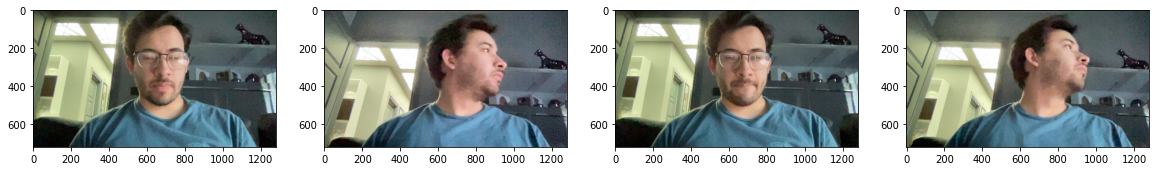

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()